**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


**Check data**

In [2]:
ASSAY = "Tewhey_K562_TileMPRA"
REGIONS=c("GATA1", "MYC", "FADS")

get_group  = function(fpath){return(str_extract(fpath, "Input|Output"))}
get_sample = function(fpath){return(str_extract(fpath, "Input.rep\\d|Input.mean|Output.rep\\d|Output.mean|Log2FC.mean"))}
get_region = function(fpath){return(str_extract(fpath, "WGS|GATA1|MYC|FADS"))}

In [3]:
region = REGIONS[1]
fdiry  = file.path(FD_RES, "results", ASSAY, "coverage")
fname  = paste("", "raw", region, "bed.gz", sep="*")
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
print(basename(fpaths))

 [1] "OL43_20221003.raw.Input.rep1.GATA1.stranded_pos.bed.gz" 
 [2] "OL43_20221003.raw.Input.rep2.GATA1.stranded_pos.bed.gz" 
 [3] "OL43_20221003.raw.Input.rep3.GATA1.stranded_pos.bed.gz" 
 [4] "OL43_20221003.raw.Input.rep4.GATA1.stranded_pos.bed.gz" 
 [5] "OL43_20221003.raw.Input.rep5.GATA1.stranded_pos.bed.gz" 
 [6] "OL43_20221003.raw.Input.rep6.GATA1.stranded_pos.bed.gz" 
 [7] "OL43_20221003.raw.Output.rep1.GATA1.stranded_pos.bed.gz"
 [8] "OL43_20221003.raw.Output.rep2.GATA1.stranded_pos.bed.gz"
 [9] "OL43_20221003.raw.Output.rep3.GATA1.stranded_pos.bed.gz"
[10] "OL43_20221003.raw.Output.rep4.GATA1.stranded_pos.bed.gz"
[11] "OL43_20221003.raw.Output.rep5.GATA1.stranded_pos.bed.gz"


In [4]:
region = REGIONS[1]
fdiry  = file.path(FD_RES, "results", ASSAY, "coverage")
fname  = paste("", "norm", region, "bed.gz", sep="*")
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
print(basename(fpaths))

 [1] "OL43_20221003.norm.Input.mean.GATA1.stranded_pos.bed.gz" 
 [2] "OL43_20221003.norm.Input.rep1.GATA1.stranded_pos.bed.gz" 
 [3] "OL43_20221003.norm.Input.rep2.GATA1.stranded_pos.bed.gz" 
 [4] "OL43_20221003.norm.Input.rep3.GATA1.stranded_pos.bed.gz" 
 [5] "OL43_20221003.norm.Input.rep4.GATA1.stranded_pos.bed.gz" 
 [6] "OL43_20221003.norm.Input.rep5.GATA1.stranded_pos.bed.gz" 
 [7] "OL43_20221003.norm.Input.rep6.GATA1.stranded_pos.bed.gz" 
 [8] "OL43_20221003.norm.Log2FC.mean.GATA1.stranded_pos.bed.gz"
 [9] "OL43_20221003.norm.Output.mean.GATA1.stranded_pos.bed.gz"
[10] "OL43_20221003.norm.Output.rep1.GATA1.stranded_pos.bed.gz"
[11] "OL43_20221003.norm.Output.rep2.GATA1.stranded_pos.bed.gz"
[12] "OL43_20221003.norm.Output.rep3.GATA1.stranded_pos.bed.gz"
[13] "OL43_20221003.norm.Output.rep4.GATA1.stranded_pos.bed.gz"
[14] "OL43_20221003.norm.Output.rep5.GATA1.stranded_pos.bed.gz"


**RUN**

In [5]:
### import library size
fdiry  = file.path(FD_RES, "results", ASSAY, "coverage", "summary")
fname  = "library_size_summary.csv"
fpath  = file.path(fdiry, fname)
dat_lib = read_csv(fpath, show_col_types = FALSE)
dat_lib = dat_lib %>% dplyr::select(-FName)
dat_lib

Type,Region,Group,Sample,Size
<chr>,<chr>,<chr>,<chr>,<dbl>
norm,FADS,Input,Input.mean,6413790
norm,FADS,Input,Input.rep1,6418470
norm,FADS,Input,Input.rep2,6412310
norm,FADS,Input,Input.rep3,6413570
norm,FADS,Input,Input.rep4,6410820
raw,FADS,Input,Input.rep1,11710957
raw,FADS,Input,Input.rep2,6544172
raw,FADS,Input,Input.rep3,10465235
raw,FADS,Input,Input.rep4,6601711


## Combine "RAW" tracks

In [6]:
ASSAY = "Tewhey_K562_TileMPRA"
REGIONS=c("GATA1", "MYC", "FADS")
TYPES  = c("raw", "norm")

cnames = c("Chrom", "Start", "End", "Count")
ctypes = c("ciic")

TYPE = "raw"

for (REGION in REGIONS){
   
    ### show progress
    cat("\n+++++++++++++++++++\n")
    cat("Region:", REGION, ";", "Type:", TYPE, "\n")
    flush.console()

    ### set file paths
    fdiry  = file.path(FD_RES, "results", ASSAY, "coverage")
    fname  = paste("", TYPE, REGION, "bed.gz", sep="*")
    fglob  = file.path(fdiry, fname)
    fpaths = Sys.glob(fglob)
    print(basename(fpaths))
    flush.console()

    ### import data and add info
    lst = lapply(fpaths, function(fpath){
        ### import data
        dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)
        dat = dat %>% 
           dplyr::mutate(Count = replace(Count, Count == ".", 0)) %>%
           dplyr::mutate(Count = as.double(Count))

        ### add information
        dat$Type   = TYPE
        dat$Region = REGION
        dat$Group  = get_group(fpath)
        dat$Sample = get_sample(fpath)

        ### return result dataframe
        return(dat)
    })

    ### get raw counts
    dat_count = bind_rows(lst) %>% 
        dplyr::select(Chrom, Start, End, Count, Sample) %>% 
        tidyr::spread(Sample, Count)

    cat("\nGet raw counts\n")
    print(dim(dat_count))
    print(head(dat_count))
    flush.console()

    ### calculate counts per million
    dat_cpm = bind_rows(lst) %>% 
        dplyr::left_join(dat_lib, by=c("Type", "Region", "Group", "Sample")) %>%
        dplyr::mutate(CPM = Count * 1000000 / Size) %>% 
        dplyr::select(Chrom, Start, End, CPM, Sample) %>% 
        tidyr::spread(Sample, CPM)

    cat("\nGet CPM\n")
    print(dim(dat_cpm))
    print(head(dat_cpm))
    flush.console()

    ### summarize input and output to calculate fold changes
    dat   = dat_cpm %>% dplyr::select(Chrom, Start, End)
    x_inp = dat_cpm %>% dplyr::select(starts_with("Input"))  %>% apply(., 1, mean, na.omit=TRUE)
    x_out = dat_cpm %>% dplyr::select(starts_with("Output")) %>% apply(., 1, mean, na.omit=TRUE)
    x_xfc =      x_out      /      x_inp
    x_lfc = log2(x_out)     - log2(x_inp)
    x_pfc = log2(x_out + 1) - log2(x_inp + 1)

    dat_Log2fc = data.frame(cbind(dat, x_inp, x_out, x_xfc, x_lfc, x_pfc))
    colnames(dat_Log2fc) = c("Chrom", "Start", "End", "Input", "Output", "FC", "Log2FC", "pLog2FC")

    cat("\nGet Log2FC\n")
    print(dim(dat_Log2fc))
    print(head(dat_Log2fc))
    flush.console()

    ### store the results
    fdiry = file.path(FD_RES, "results", ASSAY, "coverage", "summary")
    fname = paste("track", TYPE, "count",  REGION, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    write_tsv(dat_count, fpath)
    cat(fpath, "\n")

    fname = paste("track", TYPE, "cpm",    REGION, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    write_tsv(dat_cpm, fpath)
    cat(fpath, "\n")

    fname = paste("track", TYPE, "Log2FC", REGION, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    write_tsv(dat_Log2fc, fpath)
    cat(fpath, "\n")
    flush.console()   

}


+++++++++++++++++++
Region: GATA1 ; Type: raw 
 [1] "OL43_20221003.raw.Input.rep1.GATA1.stranded_pos.bed.gz" 
 [2] "OL43_20221003.raw.Input.rep2.GATA1.stranded_pos.bed.gz" 
 [3] "OL43_20221003.raw.Input.rep3.GATA1.stranded_pos.bed.gz" 
 [4] "OL43_20221003.raw.Input.rep4.GATA1.stranded_pos.bed.gz" 
 [5] "OL43_20221003.raw.Input.rep5.GATA1.stranded_pos.bed.gz" 
 [6] "OL43_20221003.raw.Input.rep6.GATA1.stranded_pos.bed.gz" 
 [7] "OL43_20221003.raw.Output.rep1.GATA1.stranded_pos.bed.gz"
 [8] "OL43_20221003.raw.Output.rep2.GATA1.stranded_pos.bed.gz"
 [9] "OL43_20221003.raw.Output.rep3.GATA1.stranded_pos.bed.gz"
[10] "OL43_20221003.raw.Output.rep4.GATA1.stranded_pos.bed.gz"
[11] "OL43_20221003.raw.Output.rep5.GATA1.stranded_pos.bed.gz"

Get raw counts
[1] 2095150      14
# A tibble: 6 × 14
  Chrom    Start     End Input…¹ Input…² Input…³ Input…⁴ Input…⁵ Input…⁶ Outpu…⁷
  <chr>    <int>   <int>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1 chrX  47785501  4.78e7    1559    1632  

## Combine "Norm" Track

In [7]:
ASSAY = "Tewhey_K562_TileMPRA"
REGIONS=c("GATA1", "MYC", "FADS")
TYPES  = c("raw", "norm")

cnames = c("Chrom", "Start", "End", "Count")
ctypes = c("ciic")

TYPE = "norm"

for (REGION in REGIONS){
   
    ### show progress
    cat("\n+++++++++++++++++++\n")
    cat("Region:", REGION, ";", "Type:", TYPE, "\n")
    flush.console()

    ### set file paths
    fdiry  = file.path(FD_RES, "results", ASSAY, "coverage")
    fname  = paste("", TYPE, REGION, "bed.gz", sep="*")
    fglob  = file.path(fdiry, fname)
    fpaths = Sys.glob(fglob)
    print(basename(fpaths))
    flush.console()

    ### import data and add info
    lst = lapply(fpaths, function(fpath){
        ### import data
        dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)
        dat = dat %>% 
           dplyr::mutate(Count = replace(Count, Count == ".", 0)) %>%
           dplyr::mutate(Count = as.double(Count))

        ### add information
        dat$Type   = TYPE
        dat$Region = REGION
        dat$Group  = get_group(fpath)
        dat$Sample = get_sample(fpath)

        ### return result dataframe
        return(dat)
    })

    ### get raw counts
    dat_count = bind_rows(lst) %>% 
        dplyr::select(Chrom, Start, End, Count, Sample) %>% 
        tidyr::spread(Sample, Count)

    cat("\nGet raw counts\n")
    print(dim(dat_count))
    print(head(dat_count))
    flush.console()

    ### calculate counts per million
    #dat_cpm = bind_rows(lst) %>% 
    #    dplyr::left_join(dat_lib, by=c("Type", "Region", "Group", "Sample")) %>%
    #    dplyr::mutate(CPM = Count * 1000000 / Size) %>% 
    #    dplyr::select(Chrom, Start, End, CPM, Sample) %>% 
    #    tidyr::spread(Sample, CPM)

    #cat("\nGet CPM\n")
    #print(dim(dat_cpm))
    #print(head(dat_cpm))
    #flush.console()

    ### summarize input and output to calculate fold changes
    dat   = dat_count %>% dplyr::select(Chrom, Start, End)
    x_inp = dat_count %>% dplyr::select(starts_with("Input.rep"))  %>% apply(., 1, mean, na.omit=TRUE)
    x_out = dat_count %>% dplyr::select(starts_with("Output.rep")) %>% apply(., 1, mean, na.omit=TRUE)
    x_xfc =      x_out      /      x_inp
    x_lfc = log2(x_out)     - log2(x_inp)
    x_pfc = log2(x_out + 1) - log2(x_inp + 1)

    dat_Log2fc = data.frame(cbind(dat, x_inp, x_out, x_xfc, x_lfc, x_pfc))
    colnames(dat_Log2fc) = c("Chrom", "Start", "End", "Input", "Output", "FC", "Log2FC", "pLog2FC")

    cat("\nGet Log2FC\n")
    print(dim(dat_Log2fc))
    print(head(dat_Log2fc))
    flush.console()

    ### store the results
    fdiry = file.path(FD_RES, "results", ASSAY, "coverage", "summary")
    fname = paste("track", TYPE, "count",  REGION, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    write_tsv(dat_count, fpath)
    cat(fpath, "\n")

    #fname = paste("track", TYPE, "cpm",    REGION, "tsv", sep=".")
    #fpath = file.path(fdiry, fname)
    #write_tsv(dat_cpm, fpath)
    #cat(fpath, "\n")

    fname = paste("track", TYPE, "Log2FC", REGION, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    write_tsv(dat_Log2fc, fpath)
    cat(fpath, "\n")
    flush.console()   

}


+++++++++++++++++++
Region: GATA1 ; Type: norm 
 [1] "OL43_20221003.norm.Input.mean.GATA1.stranded_pos.bed.gz" 
 [2] "OL43_20221003.norm.Input.rep1.GATA1.stranded_pos.bed.gz" 
 [3] "OL43_20221003.norm.Input.rep2.GATA1.stranded_pos.bed.gz" 
 [4] "OL43_20221003.norm.Input.rep3.GATA1.stranded_pos.bed.gz" 
 [5] "OL43_20221003.norm.Input.rep4.GATA1.stranded_pos.bed.gz" 
 [6] "OL43_20221003.norm.Input.rep5.GATA1.stranded_pos.bed.gz" 
 [7] "OL43_20221003.norm.Input.rep6.GATA1.stranded_pos.bed.gz" 
 [8] "OL43_20221003.norm.Log2FC.mean.GATA1.stranded_pos.bed.gz"
 [9] "OL43_20221003.norm.Output.mean.GATA1.stranded_pos.bed.gz"
[10] "OL43_20221003.norm.Output.rep1.GATA1.stranded_pos.bed.gz"
[11] "OL43_20221003.norm.Output.rep2.GATA1.stranded_pos.bed.gz"
[12] "OL43_20221003.norm.Output.rep3.GATA1.stranded_pos.bed.gz"
[13] "OL43_20221003.norm.Output.rep4.GATA1.stranded_pos.bed.gz"
[14] "OL43_20221003.norm.Output.rep5.GATA1.stranded_pos.bed.gz"

Get raw counts
[1] 2095150      17
# A tibble: 6 × 17


-----

In [7]:
ASSAY = "Tewhey_K562_TileMPRA"
REGIONS=c("GATA1", "MYC", "FADS")
TYPES  = c("raw", "norm")

cnames = c("Chrom", "Start", "End", "Count")
ctypes = c("ciic")

TYPE = "norm"
REGION = REGIONS[1]

In [8]:
### show progress
cat("\n+++++++++++++++++++\n")
cat("Region:", REGION, ";", "Type:", TYPE, "\n")
flush.console()

### set file paths
fdiry  = file.path(FD_RES, "results", ASSAY, "coverage")
fname  = paste("", TYPE, REGION, "bed.gz", sep="*")
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
print(basename(fpaths))
flush.console()


+++++++++++++++++++
Region: GATA1 ; Type: norm 
 [1] "OL43_20221003.norm.Input.mean.GATA1.stranded_pos.bed.gz" 
 [2] "OL43_20221003.norm.Input.rep1.GATA1.stranded_pos.bed.gz" 
 [3] "OL43_20221003.norm.Input.rep2.GATA1.stranded_pos.bed.gz" 
 [4] "OL43_20221003.norm.Input.rep3.GATA1.stranded_pos.bed.gz" 
 [5] "OL43_20221003.norm.Input.rep4.GATA1.stranded_pos.bed.gz" 
 [6] "OL43_20221003.norm.Input.rep5.GATA1.stranded_pos.bed.gz" 
 [7] "OL43_20221003.norm.Input.rep6.GATA1.stranded_pos.bed.gz" 
 [8] "OL43_20221003.norm.Log2FC.mean.GATA1.stranded_pos.bed.gz"
 [9] "OL43_20221003.norm.Output.mean.GATA1.stranded_pos.bed.gz"
[10] "OL43_20221003.norm.Output.rep1.GATA1.stranded_pos.bed.gz"
[11] "OL43_20221003.norm.Output.rep2.GATA1.stranded_pos.bed.gz"
[12] "OL43_20221003.norm.Output.rep3.GATA1.stranded_pos.bed.gz"
[13] "OL43_20221003.norm.Output.rep4.GATA1.stranded_pos.bed.gz"
[14] "OL43_20221003.norm.Output.rep5.GATA1.stranded_pos.bed.gz"


In [15]:
### import data and add info
lst = lapply(fpaths, function(fpath){
    ### import data
    dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)
    dat = dat %>% 
       dplyr::mutate(Count = replace(Count, Count == ".", 0)) %>%
       dplyr::mutate(Count = as.double(Count))

    ### add information
    dat$Type   = TYPE
    dat$Region = REGION
    dat$Group  = get_group(fpath)
    dat$Sample = get_sample(fpath)

    ### return result dataframe
    return(dat)
})

In [16]:
### get raw counts
dat_count = bind_rows(lst) %>% 
    dplyr::select(Chrom, Start, End, Count, Sample) %>% 
    tidyr::spread(Sample, Count)

In [17]:
head(dat_count)

Chrom,Start,End,Input.mean,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Log2FC.mean,Output.mean,Output.rep1,Output.rep2,Output.rep3,Output.rep4,Output.rep5
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47785501,47785502,1020.556,1049.719,972.682,1021.193,1004.79,1018.394,1056.556,0.865,1858.489,1830.47,2107.124,1817.622,1646.76,1890.471
chrX,47785502,47785503,1020.556,1049.719,972.682,1021.193,1004.79,1018.394,1056.556,0.865,1858.489,1830.47,2107.124,1817.622,1646.76,1890.471
chrX,47785503,47785504,1020.556,1049.719,972.682,1021.193,1004.79,1018.394,1056.556,0.865,1858.489,1830.47,2107.124,1817.622,1646.76,1890.471
chrX,47785504,47785505,1020.556,1049.719,972.682,1021.193,1004.79,1018.394,1056.556,0.865,1858.489,1830.47,2107.124,1817.622,1646.76,1890.471
chrX,47785505,47785506,1020.556,1049.719,972.682,1021.193,1004.79,1018.394,1056.556,0.865,1858.489,1830.47,2107.124,1817.622,1646.76,1890.471
chrX,47785506,47785507,1020.556,1049.719,972.682,1021.193,1004.79,1018.394,1056.556,0.865,1858.489,1830.47,2107.124,1817.622,1646.76,1890.471


In [12]:
dat = bind_rows(lst)
head(dat)

Chrom,Start,End,Count,Type,Region,Group,Sample
<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
chrX,47785501,47785502,1020.556,norm,GATA1,Input,Input.mean
chrX,47785502,47785503,1020.556,norm,GATA1,Input,Input.mean
chrX,47785503,47785504,1020.556,norm,GATA1,Input,Input.mean
chrX,47785504,47785505,1020.556,norm,GATA1,Input,Input.mean
chrX,47785505,47785506,1020.556,norm,GATA1,Input,Input.mean
chrX,47785506,47785507,1020.556,norm,GATA1,Input,Input.mean


In [13]:
unique(dat$Sample)

[1] "Input.mean"  "Input.rep1"  "Input.rep2"  "Input.rep3"  "Input.rep4" 
 [6] "Input.rep5"  "Input.rep6"  NA            "Output.mean" "Output.rep1"
[11] "Output.rep2" "Output.rep3" "Output.rep4" "Output.rep5"

In [24]:
### summarize input and output to calculate fold changes
dat   = dat_count %>% dplyr::select(Chrom, Start, End)
x_inp = dat_count %>% dplyr::select(starts_with("Input.rep"))  %>% apply(., 1, mean, na.omit=TRUE)
x_out = dat_count %>% dplyr::select(starts_with("Output.rep")) %>% apply(., 1, mean, na.omit=TRUE)

In [25]:
x_xfc =      x_out      /      x_inp
x_lfc = log2(x_out)     - log2(x_inp)
x_pfc = log2(x_out + 1) - log2(x_inp + 1)

dat_Log2fc = data.frame(cbind(dat, x_inp, x_out, x_xfc, x_lfc, x_pfc))
colnames(dat_Log2fc) = c("Chrom", "Start", "End", "Input", "Output", "FC", "Log2FC", "pLog2FC")

cat("\nGet Log2FC\n")
print(dim(dat_Log2fc))
print(head(dat_Log2fc))
flush.console()


Get Log2FC
[1] 2095150       8
  Chrom    Start      End    Input   Output       FC    Log2FC   pLog2FC
1  chrX 47785501 47785502 1020.556 1858.489 1.821056 0.8647756 0.8641387
2  chrX 47785502 47785503 1020.556 1858.489 1.821056 0.8647756 0.8641387
3  chrX 47785503 47785504 1020.556 1858.489 1.821056 0.8647756 0.8641387
4  chrX 47785504 47785505 1020.556 1858.489 1.821056 0.8647756 0.8641387
5  chrX 47785505 47785506 1020.556 1858.489 1.821056 0.8647756 0.8641387
6  chrX 47785506 47785507 1020.556 1858.489 1.821056 0.8647756 0.8641387


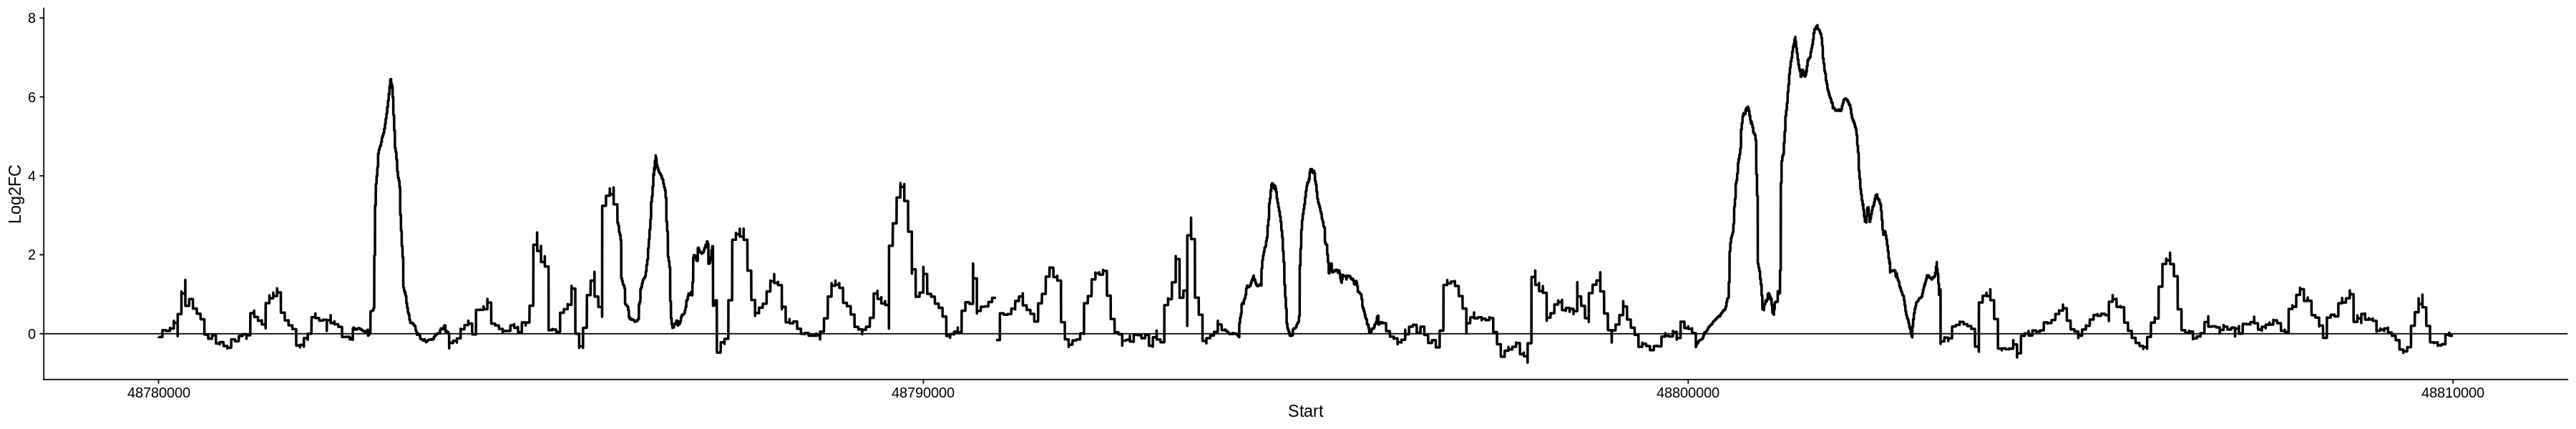

In [26]:
dat = dat_Log2fc
dat = dat %>% dplyr::filter(Chrom == "chrX", Start >= 48780000, End <= 48810000)
gpt = ggplot(dat, aes(x=Start, y=Log2FC)) + geom_line(linewidth=1) + theme_cowplot() + geom_hline(yintercept = 0)

options(repr.plot.height=5, repr.plot.width=30)
print(gpt)

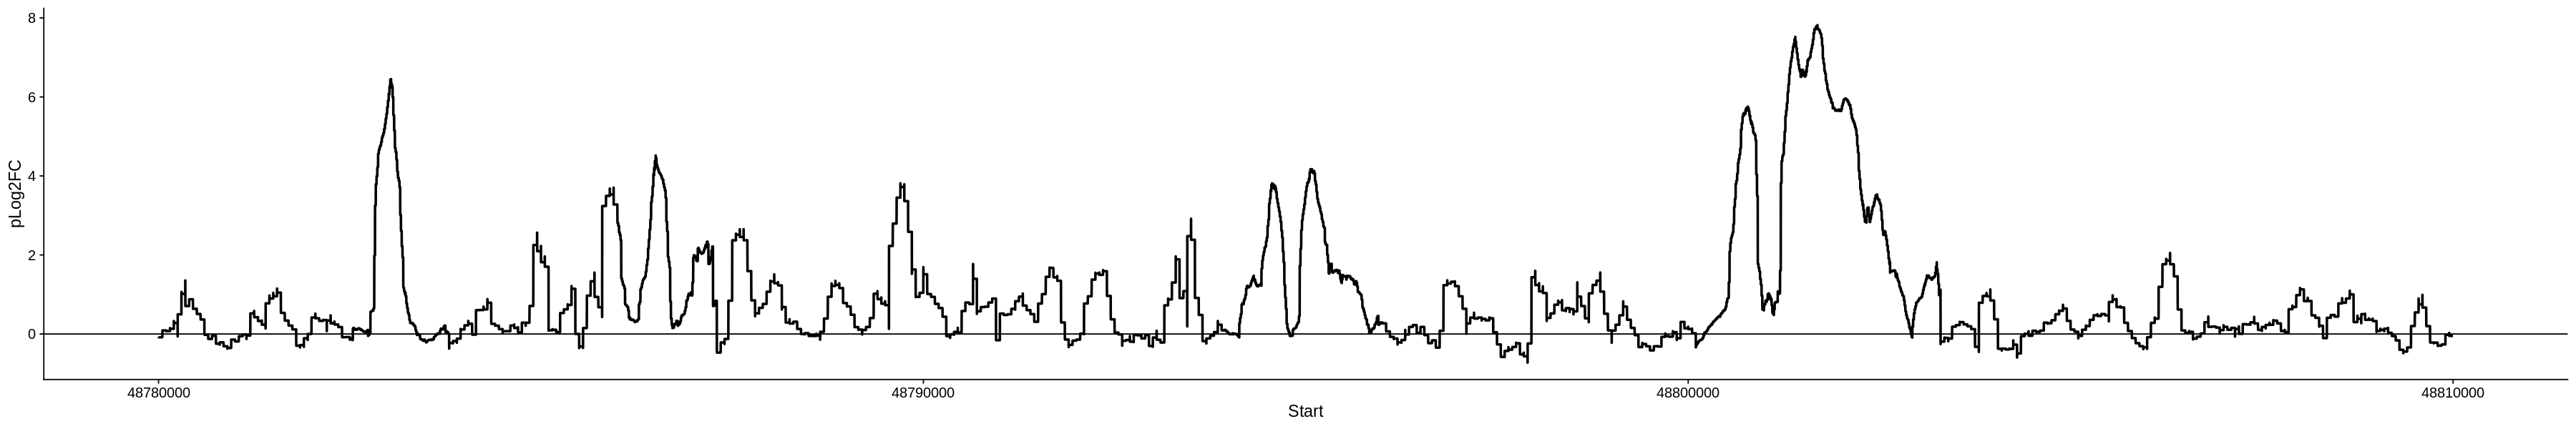

In [27]:
dat = dat_Log2fc
dat = dat %>% dplyr::filter(Chrom == "chrX", Start >= 48780000, End <= 48810000)
gpt = ggplot(dat, aes(x=Start, y=pLog2FC)) + geom_line(linewidth=1) + theme_cowplot() + geom_hline(yintercept = 0)

options(repr.plot.height=5, repr.plot.width=30)
print(gpt)

In [30]:
summary(dat_Log2fc)

    Chrom               Start               End               Input        
 Length:2095150     Min.   :47785501   Min.   :47785502   Min.   :    0.0  
 Class :character   1st Qu.:48309288   1st Qu.:48309289   1st Qu.:  983.6  
 Mode  :character   Median :48833076   Median :48833076   Median : 1755.4  
                    Mean   :48833076   Mean   :48833076   Mean   : 2397.9  
                    3rd Qu.:49356863   3rd Qu.:49356864   3rd Qu.: 2786.1  
                    Max.   :49880650   Max.   :49880651   Max.   :31136.4  
                                                                           
     Output              FC             Log2FC          pLog2FC       
 Min.   :      0   Min.   :  0.00   Min.   :-Inf     Min.   :-2.6347  
 1st Qu.:   1176   1st Qu.:  1.01   1st Qu.:0.02     1st Qu.: 0.0000  
 Median :   2289   Median :  1.22   Median :0.29     Median : 0.2291  
 Mean   :   8013   Mean   :  2.52   Mean   :-Inf     Mean   : 0.5413  
 3rd Qu.:   4321   3rd Qu.:  1.74   3

In [28]:
range(dat_count)

In [29]:
print(1)

[1] 1
